# ***Installation de Tweepy***

In [1]:
!pip install tweepy

# ***Vérification du dossier courant et du fichier .env***

In [2]:
import os
print("Dossier courant :", os.getcwd())
print("Fichier .env existe-t-il ?", os.path.exists('.env'))

Dossier courant : /content
Fichier .env existe-t-il ? True


# ***Scraping des tweets de Trump et Trudeau***

In [3]:
import tweepy
import pandas as pd
from dotenv import load_dotenv
import os
import time

# Charger Bearer Token
load_dotenv()
bearer_token = os.getenv('BEARER_TOKEN')

if not bearer_token:
    raise ValueError("Bearer Token manquant !")

client = tweepy.Client(bearer_token=bearer_token)

def get_user_tweets(username, max_results=100):
    """Récupère tweets d'un utilisateur avec gestion des erreurs."""
    try:
        # Récupérer l'utilisateur
        user = client.get_user(username=username, user_auth=False)
        if not user.data:
            print(f"❌ Utilisateur {username} non trouvé.")
            return []

        print(f"✓ Utilisateur trouvé: @{username} (ID: {user.data.id})")

        # Attendre pour éviter rate limit
        time.sleep(2)

        # Récupérer les tweets
        tweets = client.get_users_tweets(
            id=user.data.id,
            max_results=max_results,
            tweet_fields=['created_at', 'public_metrics', 'author_id', 'id', 'text', 'lang'],
            exclude=['retweets', 'replies']  # Optionnel: exclure RT et réponses
        )

        tweet_list = []
        if tweets.data:
            for tweet in tweets.data:
                tweet_list.append({
                    'contribution_id': str(tweet.id),
                    'author_id': 0 if username == "realDonaldTrump" else 1,
                    'author_name': username,
                    'created_at': tweet.created_at.isoformat(),
                    'lang': tweet.lang,
                    'favorite_count': tweet.public_metrics['like_count'],
                    'retweet_count': tweet.public_metrics['retweet_count'],
                    'text': tweet.text
                })
            print(f"✓ {len(tweet_list)} tweets récupérés pour @{username}")
        else:
            print(f"⚠ Aucun tweet pour @{username}")

        return tweet_list

    except tweepy.TooManyRequests as e:
        print(f"❌ RATE LIMIT dépassé pour {username}!")
        print("⏳ Attendez 15 minutes avant de réessayer.")
        return []

    except tweepy.TweepyException as e:
        print(f"❌ Erreur pour {username}: {e}")
        return []

# Scraper les deux utilisateurs
print("🚀 Début du scraping...\n")
all_tweets = []

for username in ["realDonaldTrump", "JustinTrudeau"]:
    tweets = get_user_tweets(username, max_results=100)
    all_tweets.extend(tweets)
    # Pause entre les utilisateurs
    time.sleep(3)

# Vérifier si on a des données
if len(all_tweets) == 0:
    print("\n❌ AUCUN TWEET RÉCUPÉRÉ!")
    print("\n💡 Solutions:")
    print("1. Attendez 15 minutes (rate limit API)")
    print("2. Vérifiez votre Bearer Token")
    print("3. Vérifiez que les comptes existent")
    print("4. Utilisez un dataset pré-existant pour tester votre modèle")
    exit()

# Créer DataFrame
df = pd.DataFrame(all_tweets)
df.to_csv('tweets_trump_trudeau.csv', index=False, encoding='utf-8')

print(f"\n✅ Dataset créé : {len(df)} tweets")
print(f"\nRépartition par auteur:")
print(df['author_id'].value_counts())
print(f"\n{df.groupby('author_name')['text'].count()}")
print(f"\nAperçu des données:")
print(df.head())


🚀 Début du scraping...

✓ Utilisateur trouvé: @realDonaldTrump (ID: 25073877)
✓ 100 tweets récupérés pour @realDonaldTrump
✓ Utilisateur trouvé: @JustinTrudeau (ID: 14260960)
❌ RATE LIMIT dépassé pour JustinTrudeau!
⏳ Attendez 15 minutes avant de réessayer.

✅ Dataset créé : 100 tweets

Répartition par auteur:
author_id
0    100
Name: count, dtype: int64

author_name
realDonaldTrump    100
Name: text, dtype: int64

Aperçu des données:
       contribution_id  author_id      author_name                 created_at  \
0  1973954507001507920          0  realDonaldTrump  2025-10-03T03:33:23+00:00   
1  1973953812517040164          0  realDonaldTrump  2025-10-03T03:30:37+00:00   
2  1973221986429222933          0  realDonaldTrump  2025-10-01T03:02:36+00:00   
3  1973221796427211262          0  realDonaldTrump  2025-10-01T03:01:51+00:00   
4  1973221572585595221          0  realDonaldTrump  2025-10-01T03:00:58+00:00   

  lang  favorite_count  retweet_count  \
0  zxx          310691          5

# ***Scraping supplémentaire des tweets de Trudeau***

In [4]:
import tweepy
import pandas as pd
from dotenv import load_dotenv
import os
import time

# Charger Bearer Token
load_dotenv()
bearer_token = os.getenv('BEARER_TOKEN')

if not bearer_token:
    raise ValueError("Bearer Token manquant !")

client = tweepy.Client(bearer_token=bearer_token)

def get_user_tweets(username, max_results=100):
    """Récupère tweets d'un utilisateur avec gestion des erreurs."""
    try:
        user = client.get_user(username=username, user_auth=False)
        if not user.data:
            print(f"❌ Utilisateur {username} non trouvé.")
            return []

        print(f"✓ Utilisateur trouvé: @{username} (ID: {user.data.id})")
        time.sleep(2)

        tweets = client.get_users_tweets(
            id=user.data.id,
            max_results=max_results,
            tweet_fields=['created_at', 'public_metrics', 'author_id', 'id', 'text', 'lang'],
            exclude=['retweets', 'replies']
        )

        tweet_list = []
        if tweets.data:
            for tweet in tweets.data:
                tweet_list.append({
                    'contribution_id': str(tweet.id),
                    'author_id': 0 if username == "realDonaldTrump" else 1,
                    'author_name': username,
                    'created_at': tweet.created_at.isoformat(),
                    'lang': tweet.lang,
                    'favorite_count': tweet.public_metrics['like_count'],
                    'retweet_count': tweet.public_metrics['retweet_count'],
                    'text': tweet.text
                })
            print(f"✓ {len(tweet_list)} tweets récupérés pour @{username}")
        else:
            print(f"⚠ Aucun tweet pour @{username}")

        return tweet_list

    except tweepy.TooManyRequests:
        print(f"❌ RATE LIMIT dépassé pour {username}!")
        print("⏳ Attendez 15 minutes avant de réessayer.")
        return []

    except tweepy.TweepyException as e:
        print(f"❌ Erreur pour {username}: {e}")
        return []

# CHARGER LES TWEETS TRUMP EXISTANTS
print("📂 Chargement des tweets Trump existants...")
try:
    df_existing = pd.read_csv('tweets_trump_trudeau.csv')
    print(f"✓ {len(df_existing)} tweets Trump chargés")
except FileNotFoundError:
    print("❌ Fichier 'tweets_trump_trudeau.csv' introuvable!")
    df_existing = pd.DataFrame()

# SCRAPER UNIQUEMENT TRUDEAU
print("\n🚀 Scraping de Trudeau...\n")
trudeau_tweets = get_user_tweets("JustinTrudeau", max_results=100)

if len(trudeau_tweets) == 0:
    print("\n❌ Échec du scraping Trudeau. Réessayez plus tard.")
    exit()

# COMBINER LES DONNÉES
df_trudeau = pd.DataFrame(trudeau_tweets)
df_combined = pd.concat([df_existing, df_trudeau], ignore_index=True)

# SAUVEGARDER
df_combined.to_csv('tweets_trump_trudeau.csv', index=False, encoding='utf-8')

print(f"\n✅ Dataset final : {len(df_combined)} tweets")
print(f"\nRépartition par auteur:")
print(df_combined['author_id'].value_counts())
print(f"\n{df_combined.groupby('author_name')['text'].count()}")



📂 Chargement des tweets Trump existants...
✓ 100 tweets Trump chargés

🚀 Scraping de Trudeau...

✓ Utilisateur trouvé: @JustinTrudeau (ID: 14260960)
✓ 99 tweets récupérés pour @JustinTrudeau

✅ Dataset final : 199 tweets

Répartition par auteur:
author_id
0    100
1     99
Name: count, dtype: int64

author_name
JustinTrudeau       99
realDonaldTrump    100
Name: text, dtype: int64


# ***Analyse exploratoire des données***

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


📊 Statistiques générales :
        contribution_id   author_id      author_name  \
count      1.990000e+02  199.000000              199   
unique              NaN         NaN                2   
top                 NaN         NaN  realDonaldTrump   
freq                NaN         NaN              100   
mean       1.911890e+18    0.497487              NaN   
std        2.091205e+16    0.501255              NaN   
min        1.889332e+18    0.000000              NaN   
25%        1.895193e+18    0.000000              NaN   
50%        1.903215e+18    0.000000              NaN   
75%        1.923613e+18    1.000000              NaN   
max        1.972823e+18    1.000000              NaN   

                       created_at lang  favorite_count  retweet_count  \
count                         199  199    1.990000e+02     199.000000   
unique                        199    5             NaN            NaN   
top     2025-09-30T00:35:34+00:00   en             NaN            NaN   
freq    

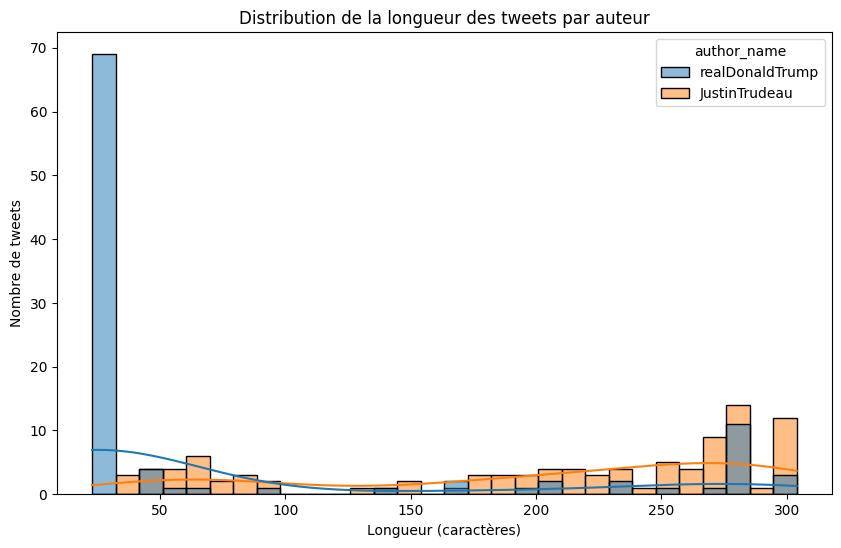


🔤 Top 10 mots - Trump :
[('https', 84), ('the', 56), ('and', 30), ('for', 16), ('will', 15), ('that', 13), ('are', 10), ('country', 9), ('united', 8), ('states', 8)]

🔤 Top 10 mots - Trudeau :
[('and', 63), ('https', 57), ('the', 53), ('canada', 51), ('ukraine', 33), ('for', 29), ('pour', 28), ('les', 28), ('with', 22), ('des', 19)]


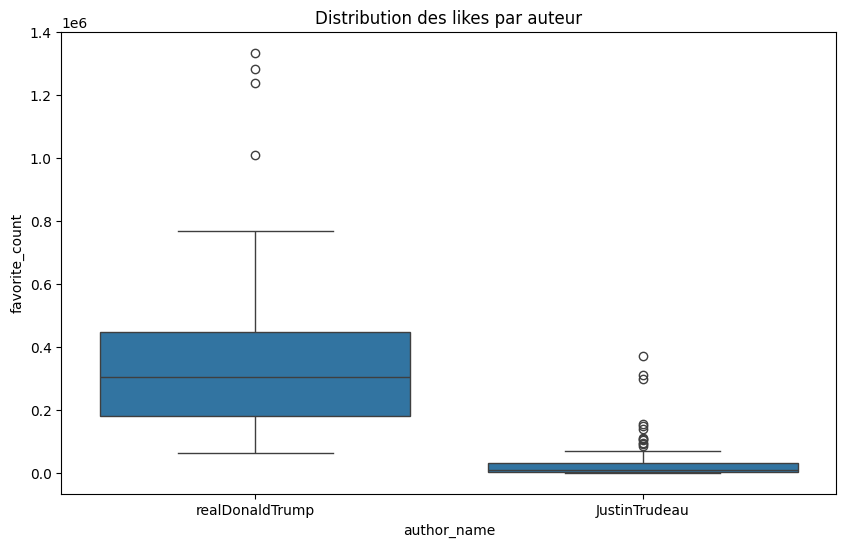

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Déjà inclus, mais garde pour compatibilité
nltk.download('punkt_tab')  # Ajout pour résoudre l'erreur
nltk.download('stopwords')  # Pour preprocessing ultérieur
nltk.download('wordnet')    # Pour lemmatisation

# Charger le dataset
df = pd.read_csv('tweets_trump_trudeau.csv')

# Statistiques de base
print("📊 Statistiques générales :")
print(df.describe(include='all'))
print("\n🌐 Répartition des langues :")
print(df['lang'].value_counts())
print("\n📏 Longueur moyenne des tweets (caractères) :")
print(df.groupby('author_name')['text'].apply(lambda x: x.str.len().mean()))

# Visualisation : Longueur des tweets
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='author_name', bins=30, kde=True)
plt.title("Distribution de la longueur des tweets par auteur")
plt.xlabel("Longueur (caractères)")
plt.ylabel("Nombre de tweets")
plt.show()

# Mots les plus fréquents par auteur
def get_top_words(texts, n=10):
    all_words = ' '.join(texts).lower()
    tokens = word_tokenize(all_words)
    tokens = [t for t in tokens if t.isalpha() and len(t) > 2]
    return Counter(tokens).most_common(n)

print("\n🔤 Top 10 mots - Trump :")
print(get_top_words(df[df['author_name'] == 'realDonaldTrump']['text']))
print("\n🔤 Top 10 mots - Trudeau :")
print(get_top_words(df[df['author_name'] == 'JustinTrudeau']['text']))

# Visualisation : Likes et retweets
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='author_name', y='favorite_count')
plt.title("Distribution des likes par auteur")
plt.show()

# ***Nettoyage et préparation des données pour l'entraînement***

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Téléchargements NLTK
print("📥 Téléchargement des ressources NLTK...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
print("✓ Ressources téléchargées\n")

# ============================================================================
# 1. CHARGEMENT DES DONNÉES
# ============================================================================
print("="*60)
print("📂 CHARGEMENT DES DONNÉES")
print("="*60)

# Charger le dataset original
df = pd.read_csv('tweets_trump_trudeau.csv')
print(f"✓ Dataset chargé : {len(df)} tweets")
print(f"\nRépartition par auteur:")
print(df['author_name'].value_counts())

# ============================================================================
# 2. FONCTION DE NETTOYAGE
# ============================================================================
print("\n" + "="*60)
print("🧹 NETTOYAGE DES TWEETS")
print("="*60)

def clean_tweet(text):
    """
    Nettoie un tweet en :
    - Supprimant les URLs
    - Remplaçant mentions/hashtags par 'USER'
    - Gardant lettres, chiffres et accents français
    - Tokenisant et retirant les stopwords
    - Lemmatisant les mots anglais
    """
    if pd.isna(text) or text == '':
        return ''

    # Supprimer URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remplacer mentions/hashtags par 'USER'
    text = re.sub(r'@\w+|\#\w+', ' USER ', text)

    # Garder lettres, chiffres, accents français
    text = re.sub(r'[^A-Za-z0-9\sàâäéèêëîïôöùûüÿçÀÂÄÉÈÊËÎÏÔÖÙÛÜŸÇ]', '', text)

    # Tokenisation et minuscules
    try:
        tokens = word_tokenize(text.lower())
    except:
        # Fallback si tokenization échoue
        tokens = text.lower().split()

    # Stopwords anglais + français
    stop_words = set(stopwords.words('english') + stopwords.words('french'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    # Lemmatisation (anglais seulement, préserver français)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) if t.isascii() else t for t in tokens]

    return ' '.join(tokens)

# Appliquer le nettoyage
print("⏳ Nettoyage en cours...")
df['clean_text'] = df['text'].apply(clean_tweet)

# Filtrer les tweets vides après nettoyage
df_filtered = df[df['clean_text'].str.len() > 5].copy()
print(f"✓ Nettoyage terminé")
print(f"✓ {len(df_filtered)} tweets conservés (tweets vides retirés)")

# Vérifier le nettoyage
print("\n📋 Exemples de nettoyage :")
print("-" * 60)
for idx in range(min(5, len(df_filtered))):
    print(f"\nTweet {idx+1}:")
    print(f"Original  : {df_filtered.iloc[idx]['text'][:80]}...")
    print(f"Nettoyé   : {df_filtered.iloc[idx]['clean_text'][:80]}...")

# ============================================================================
# 3. SAUVEGARDER LES DONNÉES NETTOYÉES
# ============================================================================
df_filtered.to_csv('tweets_clean.csv', index=False, encoding='utf-8')
print("\n" + "="*60)
print("💾 SAUVEGARDE")
print("="*60)
print("✓ Fichier sauvegardé : 'tweets_clean.csv'")

# Statistiques
print(f"\n📊 Statistiques après nettoyage :")
print(f"  - Nombre total de tweets : {len(df_filtered)}")
print(f"  - Longueur moyenne (original) : {df_filtered['text'].str.len().mean():.1f} caractères")
print(f"  - Longueur moyenne (nettoyé) : {df_filtered['clean_text'].str.len().mean():.1f} caractères")
print(f"  - Nombre moyen de mots (nettoyé) : {df_filtered['clean_text'].str.split().str.len().mean():.1f}")

# ============================================================================
# 4. CRÉER TRAIN/TEST SPLIT
# ============================================================================
print("\n" + "="*60)
print("✂️ CRÉATION TRAIN/TEST SPLIT")
print("="*60)

# Vérifier qu'on a assez de données pour chaque classe
print(f"\nRépartition par auteur (après nettoyage) :")
print(df_filtered['author_id'].value_counts())

# Split stratifié
train, test = train_test_split(
    df_filtered,
    test_size=0.2,
    random_state=42,
    stratify=df_filtered['author_id']
)

# Sauvegarder train et test
train.to_csv('train.csv', index=False, encoding='utf-8')
test.to_csv('test.csv', index=False, encoding='utf-8')

print(f"\n✓ Fichiers créés:")
print(f"  - train.csv : {len(train)} tweets")
print(f"  - test.csv : {len(test)} tweets")

print(f"\n📊 Répartition détaillée :")
print(f"\nTRAIN SET ({len(train)} tweets - 80%):")
print(f"  - Trump (0)   : {(train['author_id']==0).sum()} tweets")
print(f"  - Trudeau (1) : {(train['author_id']==1).sum()} tweets")

print(f"\nTEST SET ({len(test)} tweets - 20%):")
print(f"  - Trump (0)   : {(test['author_id']==0).sum()} tweets")
print(f"  - Trudeau (1) : {(test['author_id']==1).sum()} tweets")

# Vérifier l'équilibre
train_balance = (train['author_id']==0).sum() / len(train) * 100
test_balance = (test['author_id']==0).sum() / len(test) * 100

print(f"\n⚖️ Équilibre des classes :")
print(f"  - Train : Trump={train_balance:.1f}% | Trudeau={100-train_balance:.1f}%")
print(f"  - Test  : Trump={test_balance:.1f}% | Trudeau={100-test_balance:.1f}%")

# ============================================================================
# 5. APERÇU FINAL
# ============================================================================
print("\n" + "="*60)
print("🔍 APERÇU FINAL DES DONNÉES")
print("="*60)

print("\n📝 Échantillon du train set :")
print(train[['author_name', 'text', 'clean_text']].head(3).to_string())

print("\n" + "="*60)
print("✅ PRÉPARATION TERMINÉE")
print("="*60)
print(f"\nFichiers créés :")
print(f"  1. tweets_clean.csv - Dataset complet nettoyé ({len(df_filtered)} tweets)")
print(f"  2. train.csv - Ensemble d'entraînement ({len(train)} tweets)")
print(f"  3. test.csv - Ensemble de test ({len(test)} tweets)")
print(f"\n🚀 Prêt pour l'entraînement du modèle !")
print(f"💡 Utilisez 'clean_text' comme feature pour votre modèle.")

📥 Téléchargement des ressources NLTK...
✓ Ressources téléchargées

📂 CHARGEMENT DES DONNÉES
✓ Dataset chargé : 199 tweets

Répartition par auteur:
author_name
realDonaldTrump    100
JustinTrudeau       99
Name: count, dtype: int64

🧹 NETTOYAGE DES TWEETS
⏳ Nettoyage en cours...
✓ Nettoyage terminé
✓ 126 tweets conservés (tweets vides retirés)

📋 Exemples de nettoyage :
------------------------------------------------------------

Tweet 1:
Original  : MY son Eric’s just out book, “UNDER SIEGE,” immediately went to NUMBER ONE on Am...
Nettoyé   : erics book siege immediately went number one amazon great going eric deserve...

Tweet 2:
Original  : TO MY GREAT FELLOW AMERICANS… https://t.co/oRsrE5TTHr...
Nettoyé   : great fellow american...

Tweet 3:
Original  : Due to a massive earthquake that occurred in the Pacific Ocean, a Tsunami Warnin...
Nettoyé   : due massive earthquake occurred pacific ocean tsunami warning effect living hawa...

Tweet 4:
Original  : HAPPY 4TH OF JULY!
🎇🎆🇺🇸🦅https

# ***Vérification de la disponibilité du GPU***

In [ ]:
import torch
torch.cuda.is_available()

True

# ***Entraînement du modèle BERT pour la classification des tweets***

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, accuracy_score
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("🤖 ENTRAÎNEMENT BERT POUR CLASSIFICATION DE TWEETS")
print("="*60)

# ============================================================================
# 1. CHARGEMENT DES DONNÉES
# ============================================================================
print("\n📂 Chargement des données...")

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"✓ Train: {len(train)} tweets")
print(f"✓ Test: {len(test)} tweets")

# Filtrer textes vides ou NaN
train = train[train['clean_text'].notna() & (train['clean_text'] != '')]
test = test[test['clean_text'].notna() & (test['clean_text'] != '')]

print(f"✓ Après filtrage - Train: {len(train)}, Test: {len(test)}")

# Vérifier la répartition
print(f"\nRépartition Train: Trump={sum(train['author_id']==0)}, Trudeau={sum(train['author_id']==1)}")
print(f"Répartition Test: Trump={sum(test['author_id']==0)}, Trudeau={sum(test['author_id']==1)}")

# ============================================================================
# 2. TOKENIZER BERT
# ============================================================================
print("\n" + "="*60)
print("🔤 CHARGEMENT DU TOKENIZER BERT")
print("="*60)

# Utiliser BERT multilingue pour supporter français et anglais
model_name = 'bert-base-multilingual-cased'
print(f"Modèle: {model_name}")

tokenizer = AutoTokenizer.from_pretrained(model_name)
print("✓ Tokenizer chargé")

# ============================================================================
# 3. PRÉPARATION DES DONNÉES
# ============================================================================
print("\n" + "="*60)
print("⚙️ TOKENISATION DES DONNÉES")
print("="*60)

def tokenize_data(texts, labels, max_length=128):
    """Tokenise les textes pour BERT."""
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors=None
    )
    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels.tolist()
    }

print("⏳ Tokenisation en cours...")
train_data = tokenize_data(train['clean_text'], train['author_id'])
test_data = tokenize_data(test['clean_text'], test['author_id'])

# Convertir en Dataset Hugging Face
train_dataset = Dataset.from_dict(train_data)
test_dataset = Dataset.from_dict(test_data)

print(f"✓ Train dataset: {len(train_dataset)} exemples")
print(f"✓ Test dataset: {len(test_dataset)} exemples")

# ============================================================================
# 4. CHARGEMENT DU MODÈLE
# ============================================================================
print("\n" + "="*60)
print("🧠 CHARGEMENT DU MODÈLE BERT")
print("="*60)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    id2label={0: "Trump", 1: "Trudeau"},
    label2id={"Trump": 0, "Trudeau": 1}
)
print("✓ Modèle chargé avec 2 classes de sortie")

# Vérifier si GPU disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✓ Device: {device}")
model.to(device)

# ============================================================================
# 5. CONFIGURATION DE L'ENTRAÎNEMENT
# ============================================================================
print("\n" + "="*60)
print("⚙️ CONFIGURATION DE L'ENTRAÎNEMENT")
print("="*60)

# Arguments d'entraînement (CORRIGÉS pour compatibilité)
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',  # ← CORRECTION ICI (pas 'evaluation_strategy')
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    save_total_limit=2,
    report_to='none'  # Désactiver wandb/tensorboard
)

print("✓ Configuration créée")
print(f"  - Epochs: {training_args.num_train_epochs}")
print(f"  - Batch size: {training_args.per_device_train_batch_size}")
print(f"  - Learning rate: {training_args.learning_rate}")

# ============================================================================
# 6. MÉTRIQUES D'ÉVALUATION
# ============================================================================
def compute_metrics(eval_pred):
    """Calcule les métriques d'évaluation."""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    return {'accuracy': acc}

# ============================================================================
# 7. ENTRAÎNEMENT
# ============================================================================
print("\n" + "="*60)
print("🚀 DÉBUT DE L'ENTRAÎNEMENT")
print("="*60)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Entraîner le modèle
print("\n⏳ Entraînement en cours (cela peut prendre quelques minutes)...\n")
trainer.train()

print("\n✓ Entraînement terminé !")

# ============================================================================
# 8. ÉVALUATION
# ============================================================================
print("\n" + "="*60)
print("📊 ÉVALUATION DU MODÈLE")
print("="*60)

eval_results = trainer.evaluate()
print(f"\n✅ Résultats BERT :")
print(f"   Accuracy: {eval_results['eval_accuracy']:.4f}")
print(f"   Loss: {eval_results['eval_loss']:.4f}")

# Prédictions détaillées
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = test['author_id'].values

print("\n📋 Rapport de classification détaillé :")
print("="*60)
print(classification_report(
    y_true,
    y_pred,
    target_names=['Trump (0)', 'Trudeau (1)'],
    digits=4
))

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print("\n📊 Matrice de Confusion :")
print("              Prédit Trump  Prédit Trudeau")
print(f"Vrai Trump        {cm[0][0]:4d}          {cm[0][1]:4d}")
print(f"Vrai Trudeau      {cm[1][0]:4d}          {cm[1][1]:4d}")

# ============================================================================
# 9. SAUVEGARDE DU MODÈLE
# ============================================================================
print("\n" + "="*60)
print("💾 SAUVEGARDE DU MODÈLE")
print("="*60)

model_save_path = './bert_tweet_classifier'
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"✓ Modèle sauvegardé dans: {model_save_path}")

# ============================================================================
# 10. FONCTION DE PRÉDICTION
# ============================================================================
print("\n" + "="*60)
print("🔮 FONCTION DE PRÉDICTION")
print("="*60)

def predict_tweet(text, model, tokenizer, device):
    """Prédit l'auteur d'un tweet."""
    # Nettoyer le texte (même preprocessing que l'entraînement)
    # Si vous avez utilisé clean_tweet, appliquez-le ici aussi

    # Tokeniser
    inputs = tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        padding=True,
        max_length=128
    ).to(device)

    # Prédire
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1)
        prediction = torch.argmax(logits, dim=1).item()
        confidence = probs[0][prediction].item()

    author = 'Trump' if prediction == 0 else 'Trudeau'
    return author, confidence

# ============================================================================
# 11. TESTS DE PRÉDICTION
# ============================================================================
print("\n🧪 Tests de prédiction sur nouveaux tweets :\n")

test_tweets = [
    "GREAT AMERICA, WE'RE WINNING BIG!",
    "Climate change is real and we must act now for future generations",
    "FAKE NEWS IS THE ENEMY OF THE PEOPLE!",
    "Diversity is our strength and we welcome everyone",
    "Make America Great Again! Tremendous victory!",
    "Thank you to all Canadians for your incredible work"
]

for tweet in test_tweets:
    author, confidence = predict_tweet(tweet, model, tokenizer, device)
    print(f"Tweet: '{tweet[:60]}...'")
    print(f"→ Prédit: {author} (Confiance: {confidence*100:.1f}%)\n")

print("="*60)
print("✅ ENTRAÎNEMENT ET ÉVALUATION BERT TERMINÉS")
print("="*60)
print(f"\n📁 Fichiers créés :")
print(f"   - ./results/ - Checkpoints d'entraînement")
print(f"   - ./bert_tweet_classifier/ - Modèle final")
print(f"\n🎉 Votre modèle BERT est prêt à l'emploi !")

🤖 ENTRAÎNEMENT BERT POUR CLASSIFICATION DE TWEETS

📂 Chargement des données...
✓ Train: 100 tweets
✓ Test: 26 tweets
✓ Après filtrage - Train: 100, Test: 26

Répartition Train: Trump=25, Trudeau=75
Répartition Test: Trump=6, Trudeau=20

🔤 CHARGEMENT DU TOKENIZER BERT
Modèle: bert-base-multilingual-cased
✓ Tokenizer chargé

⚙️ TOKENISATION DES DONNÉES
⏳ Tokenisation en cours...
✓ Train dataset: 100 exemples
✓ Test dataset: 26 exemples

🧠 CHARGEMENT DU MODÈLE BERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Modèle chargé avec 2 classes de sortie
✓ Device: cuda

⚙️ CONFIGURATION DE L'ENTRAÎNEMENT
✓ Configuration créée
  - Epochs: 3
  - Batch size: 8
  - Learning rate: 5e-05

🚀 DÉBUT DE L'ENTRAÎNEMENT

⏳ Entraînement en cours (cela peut prendre quelques minutes)...



Epoch,Training Loss,Validation Loss,Accuracy
1,0.624300,0.490980,0.769231
2,0.507300,0.559735,0.769231
3,0.536000,0.358963,0.769231



✓ Entraînement terminé !

📊 ÉVALUATION DU MODÈLE



✅ Résultats BERT :
   Accuracy: 0.7692
   Loss: 0.4910

📋 Rapport de classification détaillé :
              precision    recall  f1-score   support

   Trump (0)     0.0000    0.0000    0.0000         6
 Trudeau (1)     0.7692    1.0000    0.8696        20

    accuracy                         0.7692        26
   macro avg     0.3846    0.5000    0.4348        26
weighted avg     0.5917    0.7692    0.6689        26


📊 Matrice de Confusion :
              Prédit Trump  Prédit Trudeau
Vrai Trump           0             6
Vrai Trudeau         0            20

💾 SAUVEGARDE DU MODÈLE
✓ Modèle sauvegardé dans: ./bert_tweet_classifier

🔮 FONCTION DE PRÉDICTION

🧪 Tests de prédiction sur nouveaux tweets :

Tweet: 'GREAT AMERICA, WE'RE WINNING BIG!...'
→ Prédit: Trudeau (Confiance: 71.5%)

Tweet: 'Climate change is real and we must act now for future genera...'
→ Prédit: Trudeau (Confiance: 72.6%)

Tweet: 'FAKE NEWS IS THE ENEMY OF THE PEOPLE!...'
→ Prédit: Trudeau (Confiance: 70.6%)

Tweet

# ***Vérification de la disponibilité du GPU***

In [ ]:
import torch
torch.cuda.is_available()